## Publication-quality figures with `matplotlib`

Amongst other packages, `matplotlib` is the most used package for 2D graphics. It allows easy and quick visualization while providing publication-quality figures "by default".

### Plotting via submodule `matplotlib.pyplot`

`pyplot` provides a procedural interface to the matplotlib object-oriented plotting library. It is thus closely modeled after Matlab.

In [1]:
%matplotlib

from matplotlib import pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 41)
y = np.sin(x)
x.size, y.size

(41, 41)

In [3]:
plt.plot(y)

In [4]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [5]:
plt.plot(x, y)

### Plotting inside jupyter notebooks

In [6]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 41)
y = np.sin(x)

plt.plot(x, y)

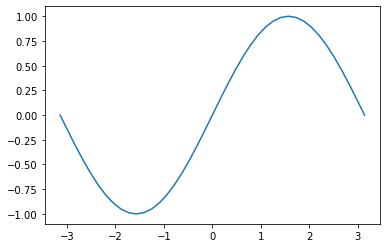

In [7]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 41)
y = np.sin(x)

plt.plot(x, y)

### Multiple plots

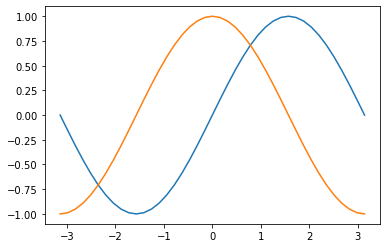

In [8]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

plt.plot(x, s)
plt.plot(x, c)

### Examples for customization

#### 1. Color and lines

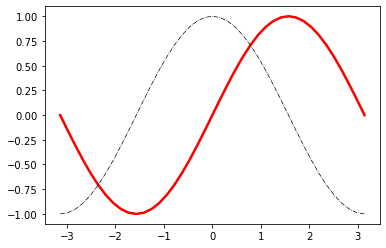

In [9]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

plt.plot(x, s, color='red', linewidth=2.5, linestyle="-")
plt.plot(x, c, color='k', linewidth=.7, linestyle="-.")

#### 2. labels and ticks

([<matplotlib.axis.XTick at 0x7ff321130e90>,
 [Text(0, 0, '$-\\pi$'), Text(0, 0, '$0$'), Text(0, 0, '$\\pi$')])

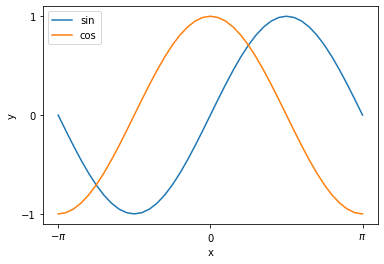

In [10]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

plt.plot(x, s, label='sin')
plt.plot(x, c, label='cos')

plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')

plt.yticks([-1, 0, 1])
plt.xticks([-np.pi, 0, np.pi], labels=['$-\pi$', '$0$', '$\pi$'])

#### 3. cropping and annotations

Text(0.5, 1.0, 'Title of this figure')

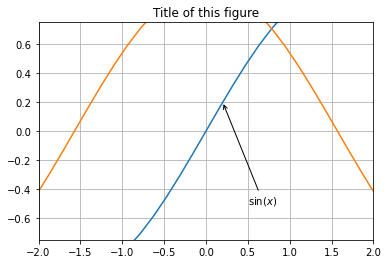

In [11]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

plt.plot(x, s)
plt.plot(x, c)

plt.grid()
plt.xlim(-2, 2)
plt.ylim(-.75, .75)

plt.annotate('$\sin(x)$', xy=(.2, np.sin(.2)), xycoords='data', 
             xytext=(.5, -.5), arrowprops={'arrowstyle': '->'})

plt.title('Title of this figure')

## Figures, Subplots and Axes

Calling pyplot methods as we did so far uses figure and axes objects implicitely. This works fine for simple plots. For more involved graphics it is advised to use the object structure explicitely.

### 1. subplots

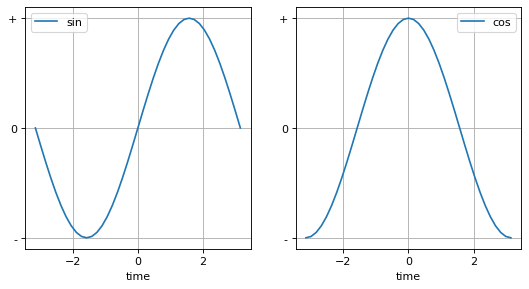

In [12]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

# Predefine a figure in which the plot is drawn
plt.figure(1, figsize=(8, 4), dpi=80)

# Create two plots within figure
fig, axes = plt.subplots(1, 2, num=1)
ax1, ax2 = axes

# Use axes-methods for plotting
pl1 = ax1.plot(x, s, label='sin')
pl2 = ax2.plot(x, c, label='cos')

# Use more axes-methods for configuration
for ax in axes:
    ax.set_xlabel('time')
    ax.set_yticks([-1, 0, 1])
    ax.set_yticklabels(['-', '0', '+'])
    ax.legend()
    ax.grid()

### 2. Managing axes

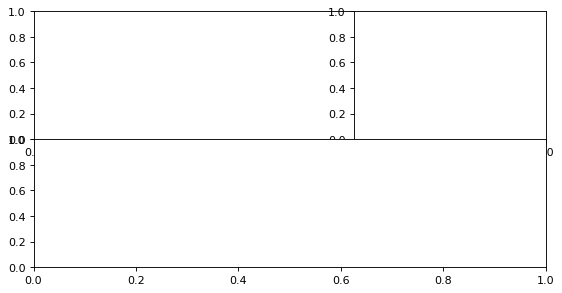

In [13]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

# Predefine a figure in which the plot is drawn
fig = plt.figure(1, figsize=(8, 4), dpi=80)

# Add axes: (anchor_x, anchor_y, width, height)
# basic structure:
# (  ax1  ) (ax2)
# (     ax3     )
left, bottom, height = 0.1, 0.1, 0.4
ax1 = fig.add_axes([left, bottom + height, 0.5, height])
ax2 = fig.add_axes([left + 0.5, bottom + height, 0.3, height])
ax3 = fig.add_axes([left, bottom, 0.8, height])

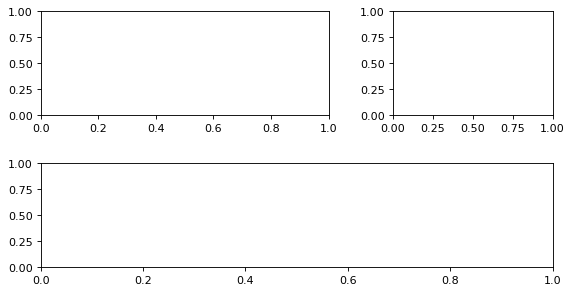

In [14]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

# Predefine a figure in which the plot is drawn
fig = plt.figure(1, figsize=(8, 4), dpi=80)

# Add axes: (anchor_x, anchor_y, width, height)
# basic structure:
# (  ax1  ) (ax2)
# (     ax3     )
left, bottom, height = 0.1, 0.1, 0.4
sep_w, sep_h = 0.05, 0.075
ax1 = fig.add_axes([left, bottom + height + sep_h, 
                    0.5 - sep_w, height - sep_h])
ax2 = fig.add_axes([left + 0.5 + sep_w, bottom + height + sep_h, 
                    0.3 - sep_w, height - sep_h])
ax3 = fig.add_axes([left, bottom, 
                    0.8, height - sep_h])

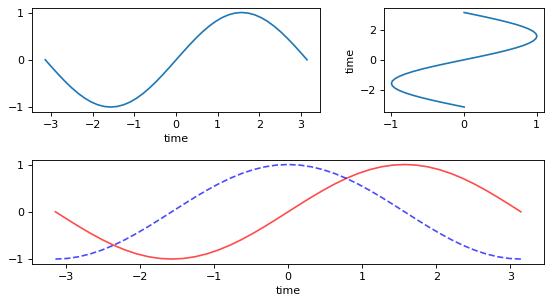

In [15]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

# Predefine a figure in which the plot is drawn
fig = plt.figure(1, figsize=(8, 4), dpi=80)

# Add axes: (anchor_x, anchor_y, width, height)
# basic structure:
# (  ax1  ) (ax2)
# (     ax3     )
left, bottom, height = 0.1, 0.1, 0.4
sep_w, sep_h = 0.05, 0.075
ax1 = fig.add_axes([left, bottom + height + sep_h, 
                    0.5 - sep_w, height - sep_h])
ax2 = fig.add_axes([left + 0.5 + sep_w, bottom + height + sep_h, 
                    0.3 - sep_w, height - sep_h])
ax3 = fig.add_axes([left, bottom, 
                    0.8, height - sep_h])

# Do some plotting
ax1.plot(x, s)
ax1.set_xlabel('time')
ax2.plot(s, x)
ax2.set_ylabel('time')
ax3.plot(x, s, color='red', linewidth=1.5, linestyle="-", alpha=.7)
ax3.plot(x, c, color='blue', linewidth=1.5, linestyle="--", alpha=.7)
ax3.set_xlabel('time')

# Save the result
save = None#'fig1.pdf'
if save:
    fig.savefig(save, dpi=400, format='pdf', transparent=True, 
                overwrite=True)
    print('Save file as %s' % save)

## Visualize Images with `imshow`

#### 1. Using only method-calls

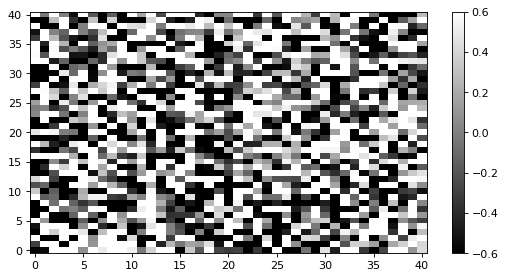

In [16]:
from numpy import random

# generate some data
data = random.randn(41, 41)

# Predefine a figure in which the plot is drawn
plt.figure(1, figsize=(8, 4), dpi=80)

# Plot the image
plt.imshow(data, aspect='auto', interpolation='nearest', origin='lower', 
          cmap='gray', vmin=-.6, vmax=.6)
plt.colorbar()

#### 2. Using objects eplicitely

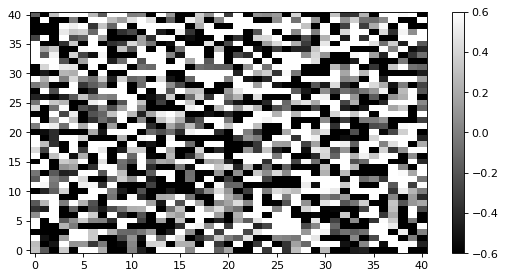

In [17]:
from numpy import random

# generate some data
data = random.randn(41, 41)

# Predefine a figure in which the plot is drawn
plt.figure(1, figsize=(8, 4), dpi=80)
fig, axes = plt.subplots(1, 1, num=1)
ax1 = axes

# Plot the image
img = ax1.imshow(data, aspect='auto', interpolation='nearest', 
                 origin='lower', cmap='gray', vmin=-.6, vmax=.6)
clb = plt.colorbar(img, ax=ax1)

## Setting defaults via `pyplot.rc`

Code for plotting detailed graphics tends to be long and repetitive. This can be avoided by modifying default parameter structures.

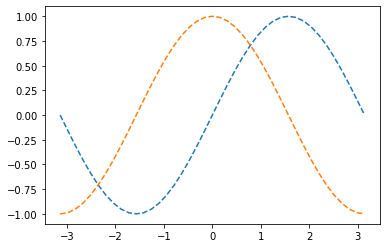

In [18]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

# plot
plt.plot(x, s, linewidth=1.5, linestyle="--", antialiased=True)
plt.plot(x, c, linewidth=1.5, linestyle="--", antialiased=True)

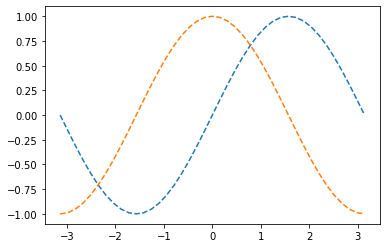

In [19]:
x = np.linspace(-np.pi, np.pi, 41)
s, c = np.sin(x), np.cos(x)

# configure rc: (group, kwargs)
plt.rc('lines', linewidth=1.5, linestyle="--", antialiased=True)

# plot
plt.plot(x, s)
plt.plot(x, c)

In [20]:
plt.rc('image', aspect='auto', interpolation='nearest', origin='lower', 
       cmap='gray')
plt.rc('font', size=8)

print(plt.rcParams.keys())

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

## meshes and `pcolormesh`

`imshow` is mostly used for quick visualization of images. Generally, `imshow` is not suited to visualize 2D data. 

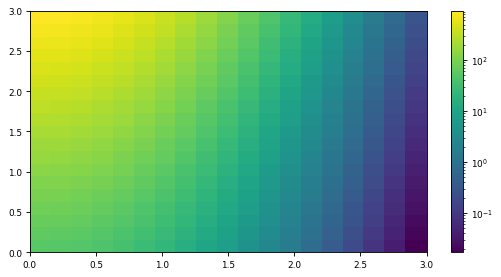

In [21]:
import matplotlib as mpl

# generate some data
def f(x, y):
    return np.exp(-x**2 + y + 4)

n = 20  # resolution
x, y = np.linspace(0, 3, n), np.linspace(0, 3, n)

# Construct 2D grid so that f(X, Y) yields corrects dimensions (meshgrid)
X, Y = np.meshgrid(x, y)
data = f(X, Y)

# visualize via pcolormesh
plt.figure(1, figsize=(8, 4), dpi=80)
fig, axes = plt.subplots(1, 1, num=1)
ax1 = axes

img = ax1.pcolormesh(X, Y, data, cmap='viridis', 
                     norm=mpl.colors.LogNorm())
clb = plt.colorbar(img, ax=ax1)

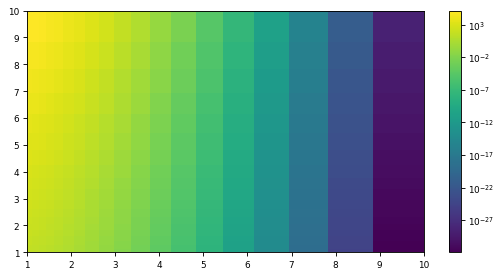

In [22]:
import matplotlib as mpl

# generate some data
def f(x, y):
    return np.exp(-x**2 + y + 4)

n = 20  # resolution
x, y = np.logspace(0, 1, n), np.logspace(0, 1, n)

# Construct 2D grid so that f(X, Y) yields corrects dimensions (meshgrid)
X, Y = np.meshgrid(x, y)
data = f(X, Y)

# visualize via pcolormesh
plt.figure(1, figsize=(8, 4), dpi=80)
fig, axes = plt.subplots(1, 1, num=1)
ax1 = axes

img = ax1.pcolormesh(X, Y, data, cmap='viridis', 
                     norm=mpl.colors.LogNorm())
clb = plt.colorbar(img, ax=ax1)